# WD Database for Python

The goal is to download the following database: http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J%2FMNRAS%2F455%2F3413 for use in a machine-learning inspired scheme to 

In [2]:
#Preamble. Standard packages for to load
import astropy
from astropy.table import Table, Column, MaskedColumn
import numpy as np
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt
import urllib2
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
from astroquery.sdss import SDSS
from astropy import units as u
from astropy import coordinates as coords
from astropy.io import fits

//anaconda/envs/py27/lib/python2.7/site-packages/astroquery/sdss/__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [3]:
catalog_list = Vizier.find_catalogs('New white dwarf SDSS DR12')

In [4]:
print({k:v.description for k,v in catalog_list.items()})

{u'J/MNRAS/455/3413': u'New white dwarf and subdwarf stars in SDSS DR12 (Kepler+, 2016)'}


In [5]:
Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list.keys())

In [6]:
print(catalogs)

TableList with 1 tables:
	'0:J/MNRAS/455/3413/table6' with 34 column(s) and 6647 row(s) 


In [7]:
catalogs[0]

_RAJ2000,_DEJ2000,PMF,SDSS,S_N,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,E_B-V_,pm,GLON,GLAT,SpType,Teff,e_Teff,logg,e_logg,Teff_3D_,e_Teff_3D_,logg_3D_,e_logg_3D_,Mass,e_Mass,Com,Sp,_RA.icrs,_DE.icrs
deg,deg,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mas / yr,deg,deg,,K,K,[cm/s2],[cm/s2],K,K,[cm/s2],[cm/s2],Msun,Msun,,,deg,deg
float64,float64,str15,str19,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str9,int32,int32,float32,float32,int32,int32,float32,float32,float64,float64,str18,str2,float64,float64
192.8436,-2.6717,0337-51997-0195,125122.06-023737.21,22,18.120,0.019,17.570,0.020,17.549,0.013,17.572,0.017,17.601,0.023,0.021,5.100,302.9,60.2,sdB,29108,463,5.409,0.087,--,--,--,--,--,--,,Sp,192.8436,-2.6717
232.7803,55.0191,0614-53437-0049,153112.62+550139.60,22,17.615,0.015,17.827,0.018,18.315,0.016,18.672,0.020,18.964,0.041,0.018,8.300,88.1,49.9,sdB,29876,374,5.292,0.080,--,--,--,--,--,--,,Sp,232.7803,55.0191
221.7148,58.1535,0790-52346-0634,144657.14+580920.12,46,15.839,0.014,15.671,0.013,15.667,0.020,15.702,0.017,15.759,0.016,0.010,3.900,97.9,53.0,sdB,30893,165,5.033,0.032,--,--,--,--,--,--,,Sp,221.7148,58.1535
117.3776,28.0867,1059-52618-0515,074915.66+280641.01,11,18.910,0.021,19.100,0.025,19.519,0.022,19.863,0.032,20.149,0.109,0.035,4.600,192.5,24.3,sdB,29404,704,5.450,0.142,--,--,--,--,--,--,,Sp,117.3776,28.0867
326.6084,-7.2167,1177-52824-0636,214627.88-071117.59,45,16.163,0.014,15.937,0.027,15.864,0.012,15.856,0.013,15.905,0.017,0.035,7.000,48.6,-41.9,sdB,30503,191,5.019,0.036,--,--,--,--,--,--,,Sp,326.6084,-7.2167
63.9077,25.6175,1254-52972-0163,041536.05+253857.11,41,16.143,0.015,16.269,0.015,16.458,0.010,16.646,0.011,16.832,0.016,0.483,6.100,170.4,-17.9,He-sdO,64329,1429,6.118,0.073,--,--,--,--,--,--,,Sp,63.9077,25.6175
251.2279,21.5942,1569-53168-0370,164453.35+213711.54,20,17.752,0.017,17.819,0.013,18.218,0.011,18.552,0.012,18.807,0.037,0.050,3.000,40.5,37.0,sdB,26349,889,5.114,0.104,--,--,--,--,--,--,,Sp,251.2279,21.5942
244.9250,24.1559,1574-53476-0225,161942.83+240715.70,46,16.792,0.022,16.420,0.023,16.462,0.016,16.481,0.013,16.570,0.018,0.067,11.900,41.5,43.3,sdB,27741,342,5.227,0.048,--,--,--,--,--,--,,Sp,244.9250,24.1559


In [14]:
set(catalogs[0]['SpType'])
tot = 0

catalogs[0]['SpType'].count("DA")

0337-51997-0195
0614-53437-0049
0790-52346-0634
1059-52618-0515
1177-52824-0636
1254-52972-0163
1569-53168-0370
1574-53476-0225
1577-53495-0460
1653-53534-0057
1655-53523-0596
1658-53240-0074
1659-53224-0307
1689-53177-0359
1694-53472-0327
1700-53502-0364
1711-53535-0092
1711-53535-0532
1722-53852-0251
1771-53498-0344
1804-53886-0066
1818-54539-0478
1829-53494-0300
1836-54567-0096
1836-54567-0339
1844-54138-0118
1853-53566-0422
1871-53384-0583
1886-53237-0039
1888-53239-0343
1908-53239-0273
1910-53299-0141
1910-53299-0369
1918-53240-0541
1955-53442-0640
1962-53321-0539
1981-53463-0630
1989-53772-0213
2057-53816-0271
2078-53378-0340
2080-53350-0205
2080-53350-0340
2118-53820-0640
2171-53557-0595
2178-54629-0321
2182-53905-0032
2182-53905-0116
2182-53905-0512
2195-54234-0038
2195-54234-0072
2195-54234-0232
2209-53907-0023
2236-53729-0299
2247-53857-0624
2248-53558-0344
2250-53566-0213
2250-53566-0281
2252-53613-0457
2253-54551-0206
2256-53859-0153
2257-53612-0085
2257-53612-0401
2258-543

In [7]:
catalogs[0]['Coordinates'] = coords.SkyCoord(catalogs['J/MNRAS/455/3413/table6']['_RAJ2000'], catalogs['J/MNRAS/455/3413/table6']['_DEJ2000'], frame='icrs')

In [8]:
PMF = catalogs[0]['PMF']
catalogs[0]['plate'] = MaskedColumn(length=len(catalogs[0]),dtype='int32')
catalogs[0]['mjd'] = MaskedColumn(length=len(catalogs[0]),dtype='int32')
catalogs[0]['fiber'] = MaskedColumn(length=len(catalogs[0]),dtype='int32')


for ind,obj in enumerate(PMF):
    split_PMF = obj.split('-')
    catalogs[0]['plate'][ind] = split_PMF[0]
    catalogs[0]['mjd'][ind] = split_PMF[1]
    catalogs[0]['fiber'][ind] = split_PMF[2]

In [9]:
directory = 'data/'
catalogs[0]['file'] = MaskedColumn(length=len(catalogs[0]),dtype='S32')
#print catalogs[0]['plate'][5950:5970]
#stop

##PLATE 6686 WOULDN'T DOWNLOAD
##PLATE 7120 #14 WOULDN'T DOWNLOAD
for ind,plate in enumerate(catalogs[0]['plate']):
    try:
        print ind,plate
#         if plate < 7120:
#             continue
        if ind == 5965 or ind == 4402:
            continue
        spec = SDSS.get_spectra_async(plate=plate, mjd=catalogs[0]['mjd'][ind], fiberID=catalogs[0]['fiber'][ind])
        url_of_interest = str(spec[0]).split()[4]
        catalogs[0]['file'][ind] = url_of_interest.split('/')[-1]
#         get_file = urllib2.urlopen(url_of_interest)
#         output_file = open(directory+url_of_interest.split('/')[-1], 'wb')
#         output_file.write(get_file.read())
#         output_file.close
    except:
        print 'Had an error'
        if ind == 4402 or ind == 5965:
            continue
        spec = SDSS.get_spectra_async(plate=plate, mjd=catalogs[0]['mjd'][ind], fiberID=catalogs[0]['fiber'][ind])
        url_of_interest = str(spec[0]).split()[4]
        catalogs[0]['file'][ind] = url_of_interest.split('/')[-1]
#         get_file = urllib2.urlopen(url_of_interest)
#         output_file = open(directory+url_of_interest.split('/')[-1], 'wb')
#         output_file.write(get_file.read())
#         output_file.close
        print 'Fixed it!'

0 337
1 614
2 790
3 1059
4 1177
5 1254
6 1569
7 1574
8 1577
9 1653
10 1655
11 1658
12 1659
13 1689
14 1694
15 1700
16 1711
17 1711
18 1722
19 1771
20 1804
21 1818
22 1829
23 1836
24 1836
25 1844
26 1853
27 1871
28 1886
29 1888
30 1908
31 1910
32 1910
33 1918
34 1955
35 1962
36 1981
37 1989
38 2057
39 2078
40 2080
41 2080
42 2118
43 2171
44 2178
45 2182
46 2182
47 2182
48 2195
49 2195
50 2195
51 2209
52 2236
53 2247
54 2248
55 2250
56 2250
57 2252
58 2253
59 2256
60 2257
61 2257
62 2258
63 2259
64 2262
65 2303
66 2318
67 2318
68 2349
69 2355
70 2373
71 2417
72 2425
73 2432
74 2446
75 2452
76 2489
77 2490
78 2518
79 2524
80 2526
81 2533
82 2551
83 2551
84 2552
85 2582
86 2592
87 2601
88 2605
89 2695
90 2743
91 2762
92 2774
93 2780
94 2795
95 2795
96 2797
97 2797
98 2798
99 2800
100 2807
101 2808
102 2817
103 2817
104 2817
105 2818
106 2821
107 2822
108 2828
109 2876
110 2909
111 2935
112 2943
113 2956
114 2956
115 3586
116 3586
117 3586
118 3586
119 3587
120 3587
121 3587
122 3587
123 35

In [14]:
def plot_spec(num,catalogs):
    fits_spec = fits.open('data/'+catalogs[0]['file'][num])
    wavelength = 10**fits_spec[1].data['loglam']
    flux = fits_spec[1].data['flux']
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    ax[0].plot(wavelength, flux)
    ax[1].plot(wavelength, flux)
    ax[1].set_xlim(3860, 3920)
    plt.show()

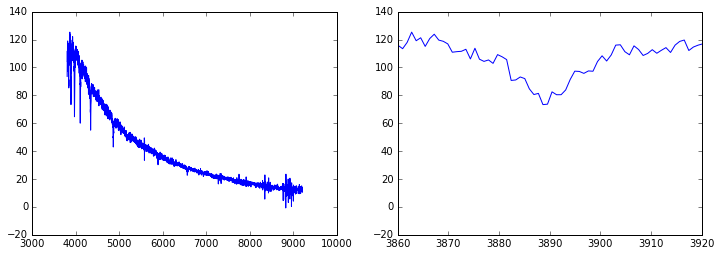

spec-1853-53566-0422.fits


In [16]:
plot_spec(26,catalogs)
print catalogs[0]['file'][26]